<a href="https://colab.research.google.com/github/sros-UNED/NLPforHumanist/blob/master/Digging_for_Gold_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digging for Gold: Knowledge Extraction from Text
## CLS Training School , May, 2023
## Introduction to Information Extraction 

Welcome to Digging for Gold!
This is a hands-on workshop focusing on various foundation techniques for Natural Language Processing and their applications in Digital Humanities and beyond. 

To follow along, you can run the script portions piecemeal, in order, as we progress through the workshop material. Up to you. Familiarity with programming concepts and Python is required; Numpy and Jupyter desirable.

Instructor:


<figure>
        <div align="center">
            <img src="http://postdata.linhd.uned.es/wp-content/uploads/2016/06/salva.png", width="300" height="300",
         alt="Salva's picture">
    <figcaption>
        <strong>Salvador Ros</strong>
        <br/>
        <em>sros@scc.uned.es</em>, <em><a href="https://twitter.com/srosmu">@srosmu</a></em>
        <br/>
        Assitant Professor  at <a href="https://www.uned.es/">UNED</a>
       </div>
    </figcaption>
</figure>

<figure>
        <div align="center">
            <img src="http://postdata.linhd.uned.es/wp-content/uploads/2016/06/gold_cycle.jpg", width="300" height="300",
         alt="Gold Cycle">
</figure>

Data is the new gold for eeverybody included the humanist. The first step in the cycle is to locate/obtain data for using them for the next steps. 
When We know which data we want to use the first step would be to upload in our system to work with them.




# FIRST STEP READING DATA
Usually our data are in a well known files as csv, txt or excell. When we read our data in our system these will be arrange iin differents structures. We need to understand these structures to use them.

1. Reading from a CSV file
2. Reading from a txt file
3. Reading from multiple txt files
4. Exercise
5. Reading Excel files


In collab first of all we have to upload our files to our google drive. After this we need permision to connect with it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Obtaining Data from Guttemberg proyect

In [ ]:
# Just in case install package
#https://pypi.org/project/gutenbergpy/
!pip install gutenbergpy

In [ ]:
# Now an example
import gutenbergpy.textget
raw_book = gutenbergpy.textget.get_text_by_id(53419) # with headers
clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers 
print(type(raw_book))
string_raw_book=str(raw_book)
print(type(string_raw_book))

In [10]:
print(f'Example phrase from the cleaned book: {" ".join(str(clean_book[3000:3050]).split(" "))}')
print(clean_book)

Example phrase from the cleaned book: b'clanking chains, ghostly sights and gruesome sound'
b'book was produced from scanned images of public domain\nmaterial from the Google Books project.)\n\n\n\n\n\n\n\n\n\n\n                      Twenty-Five Ghost Stories.\n\n                          COMPILED AND EDITED\n\n                                  BY\n\n                            W. BOB HOLLAND.\n\n             \xe2\x80\x9cThere are more things in heaven and earth, Horatio,\n              Than are dreamt of in your philosophy.\xe2\x80\x9d\n                              --_Hamlet._\n\n                          COPYRIGHT, 1904, BY\n                   J. S. OGILVIE PUBLISHING COMPANY.\n\n                               NEW YORK:\n\n                   J. S. OGILVIE PUBLISHING COMPANY,\n                            57 ROSE STREET.\n\n\n\n\nCONTENTS.\n\n\n                                                                    PAGE\n\nPreface                                                           

In [ ]:
#always you can build a function
"""def upload_book():
    # This gets a book by its gutenberg id number
    raw_book = gutenbergpy.textget.get_text_by_id(2701) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book
"""

# To look for a book you can visit 
https://www.gutenberg.org

  or of course always there is a programming method

https://pypi.org/project/gutenbergpy/

<br />

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>
<code style="background:red;color:white">You can grab some attention here.</code>

---

<br />

Some interesting collections are (by Tess)

1.   Horror: https://www.gutenberg.org/ebooks/bookshelf/42
2.   Science fiction: https://www.gutenberg.org/ebooks/bookshelf/68
3.   Science fiction by women: https://www.gutenberg.org/ebooks/bookshelf/403?start_index=51
4.   Fairy Tales: https://www.gutenberg.org/ebooks/bookshelf/216

5. data set consists of 450 novels by 289 authors in German, French and English: https://txtlab.org/novel450/





In [ ]:
import zipfile; import os; import urllib.request
urllib.request.urlretrieve("https://github.com/linhd-postdata/summer-school2019/raw/master/data.zip", "data.zip")
zipfile.ZipFile(os.path.abspath("data.zip")).extractall(".")

# Using NLTK for getting text

NLTK is a Python library for word processing. Documentation can be found on [NLTK's official website](https://www.nltk.org/) (in English).

However, this library offers us something very useful that others does not: Download collections of texts from the code.

We are going to teach the basic functionality for this task and that you can collect texts in a simple way, to operate with them with Python, Spacy or, if you prefer, with any other NLP library that you dare to try.

<br />

First we download and import the library:

In [11]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we will call a function in which we can choose which texts we want to download. It is somewhat rudimentary but very practical!

You just have to write the following command and a menu will be shown in which we can navigate by typing the option we want. For example, if we want to see the list, we simply type **`l`** (List) in the menu and press enter to start seeing it. To exit list mode we write **`q`** and press enter.

Once we have seen one that interests us on the list, we can download it. When we find a collection of texts that we want to download, we choose the **download** (`d`) option, press enter, and then type the name of the collection, and hit enter again. Our new texts will be downloaded in the `corpora` folder as a zip file. Remember to press `q` to exit download mode!

In [ ]:
nltk.download(download_dir='.')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


#To see the collection of downloaded texts we can do:

In [ ]:
import os
from os import listdir
os.listdir('corpora/"""corpus"""-elegido')  # sustituimos """corpus""" por el nombre de la colección elegida

## Reading from a CSV file

In [ ]:
 import pandas as pd
 path='drive/My Drive/Colab Notebooks/trinity/data_trinity/'

In [ ]:
# Reading data from a CSV file using read_csv() in a DATAFRAME
reviews=pd.read_csv(path+'reviews.csv')

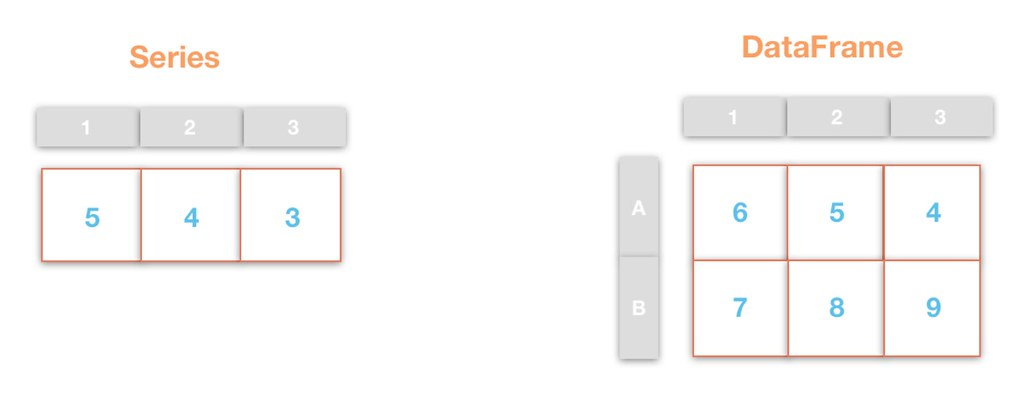

##Seeing Data


In [ ]:
# Printing shape of dataframe
print('Shape=>',reviews.shape)

NameError: ignored

In [ ]:
# Printing first five rows
reviews.head()

In [ ]:
reviews.describe

In [ ]:
reviews.mean()

In [ ]:
data =reviews.count()
type(data)
data[0]

17494

In [ ]:
print('First row  DataFrame:')
reviews.loc[0]

First row  DataFrame:


review_id                                                          1
title                                    Spooky's Jump Scare Mansion
year                                                            2016
user_review        I'm scared and hearing creepy voices.  So I'll...
user_suggestion                                                    1
Name: 0, dtype: object

In [ ]:
reviews.iloc[0][1]
reviews.iloc[:, 0]
print(reviews[['title','year']])
reviews [['title','year']] [:1]

                             title    year
0      Spooky's Jump Scare Mansion  2016.0
1      Spooky's Jump Scare Mansion  2016.0
2      Spooky's Jump Scare Mansion  2016.0
3      Spooky's Jump Scare Mansion  2015.0
4      Spooky's Jump Scare Mansion  2015.0
...                            ...     ...
17489                 EverQuest II  2012.0
17490                 EverQuest II  2017.0
17491                 EverQuest II  2011.0
17492                 EverQuest II     NaN
17493                 EverQuest II     NaN

[17494 rows x 2 columns]


,title,year
0,Spooky's Jump Scare Mansion,2016.0


In [ ]:
#WRITING A DATAFRAME 
reviews.to_csv(path+"reviews.tsv",sep = "\t")

In [ ]:
reviews.columns.tolist()
reviews['title'].tolist()

## Reading from a txt file

In [ ]:
# Reading text file in read mode as a file object using open()
file=open('drive/My Drive/Colab Notebooks/trinity/moby_dick/moby_chp1.txt',mode='r',encoding='utf-8')

In [ ]:
# Getting text data as string from file object using read()
text=file.read()
type(text)

str

In [ ]:
# Closing the file using close()
file.close()

In [ ]:
print(text)

## Reading from multiple txt files

In [ ]:
import os

In [ ]:
!unzip dataset.zip

In [ ]:
# Getting list of all files in the folder
file_names=os.listdir(path='drive/My Drive/Colab Notebooks/trinity/moby_dick/')

In [ ]:
len(file_names)

3

In [ ]:
file_names[:3]

['moby_chp1.txt', 'moby_chp2.txt', 'moby_chp3.txt']

In [ ]:
files=[]

# Filling the list with text data from all the files
for file_name in file_names:
    file=open('drive/My Drive/Colab Notebooks/trinity/moby_dick/'+file_name,mode='r',encoding='utf-8')
    text=file.read()
    file.close()
    
    # Appending data to the list
    files.append(text)
    type(files)

In [ ]:
# Creating dataframe from the list
df=pd.DataFrame(files,columns=['text'])

In [ ]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (3, 1)


In [ ]:
# Printing first three rows
df.head()

,text
0,CHAPTER 1\n\nLoomings.\n\n\nCall me Ishmael. ...
1,CHAPTER 2\n\nThe Carpet-Bag.\n\n\nI stuffed a ...
2,CHAPTER 3\n\nThe Spouter-Inn.\n\n\nEntering th...


In [ ]:
df.to_csv('dataframe.csv',index=False)

## Import EXCEL 


In [ ]:
path2 = path+"hojaExcelDatosColecciones.xlsx" 

fExcel = pd.ExcelFile(path2)

#Sheet NAMES
print("SHEET NAMES IN THE FILE: ", fExcel.sheet_names,"\n\n")

#TO GET SHEET 
dfHoja1 = fExcel.parse("2014")
print ("Sheet content 2014\n\n", dfHoja1)

print ("\n\n")

dfHoja2 = fExcel.parse(0)# SHEETS starting by 0
print ("FIST SHEET CONTENT \n", dfHoja2)

SHEET NAMES IN THE FILE:  ['2013', '2014'] 


Sheet content 2014

     idDoc  ENGLISH  FRENCH  FRENCH-UN1  ...  FRENCH-UN4  ITALIAN  RUSSIAN  SPANISH
0      13      290     305         351  ...         308      323      271      290
1      14      606     602         691  ...         652      619      551      563
2      15      302     318         334  ...         313      288      249      273
3      16      601     667         748  ...         740      608      554      539
4      17      267     270         311  ...         295      296      229      265
5      18      611     657         734  ...         720      585      541      528
6      19      289     346         341  ...         323      311      237      286
7      20      612     616         645  ...         662      595      500      563
8      21      669     734         754  ...         763      668      608      658
9      22      679     774         778  ...         750      682      601      646
10     23      665  

In [ ]:
#Reading first sheet ignoring raw 3, 4 and 5
df1=fExcel.parse(0, skiprows=[3,4,5])

print(df1)

In [ ]:
#eWRITE TWO SHEETS each one with a DATAFRAME 
writer = pd.ExcelWriter('ficheroExcelGuardar.xlsx')
df1.to_excel(writer,"hojaNueva")
dfHoja2.to_excel(writer,"segundaHoja")
writer.save()

## Exercise

Read data from all the txt files, combine them, and convert to a dataframe of **lines**. The dataframe must contain one columns.
Useful funtions:
>readlines: Return all lines in the file, as a list where each line is an item in the list object:

>extend: The extend() method adds all the elements of an iterable (list, tuple, string etc.) to the end of the list.


In [ ]:
import os
import pandas as pd
path1='drive/My Drive/Colab Notebooks/trinity/moby_dick/'
files_names=os._____(path1)
lines=___
for iterador in ______:
    print(iterador)
    file=open(path1+iterador,mode='r', encoding='utf-8')
    temp_line=file.____()
    file.close()
    lines.____(temp_line)
    
sentences=[]
for iterador in lines:
    sentences._____(iterador)
   
result=pd.DataFrame({'Lines':sentences})
print(result['Lines'][2])
print('Shape->', result.shape)
result.head()

AttributeError: ignored

## Excercise - Step by step


In [ ]:
# Getting list of all files in the folder
files=os.listdir(path1)

files

In [ ]:
lines=[]

# Reading all the lines from the txt files
for i in files:
    temp_file=open('drive/My Drive/Colab Notebooks/trinity/moby_dick/'+i,mode='r',encoding='utf-8')
    temp=temp_file.readlines()
    lines.extend(temp)

In [ ]:
len(lines)

In [ ]:
# Lines from the text files
lines[:10]

In [ ]:
# Sentence or even letter
lines[5][:]

In [ ]:
# Extracting sentences and labels from lines
sentences=[]
for i in lines:
    sentences.append(i)

In [ ]:
# First 10 sentences
sentences[:10]

In [ ]:
# Creating a dataframe
df=pd.DataFrame({
    'Lines':sentences,
})

In [ ]:
# Printing shape of dataframe
print('Shape=>',result.shape)

In [ ]:
result.head()